<a href="https://colab.research.google.com/github/AnanyaKodali/MAT-494/blob/main/2_3_IndependentVariables%26RandomSamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Independent Variables & Random Samples**
Understanding the relationships between random variables is fundamental in probability and statistics. This report explores key concepts such as joint probability distributions, correlation and dependence, and random samples. We delve into both discrete and continuous random variables, providing mathematical definitions, examples, and Python code with visualizations to illustrate these concepts.



##**2.3.1 Joint Probability Distributions**

Joint probability distributions describe how two or more random variables simultaneously occur. They provide a comprehensive picture of the variables' combined behavior, which is essential for analyzing interdependencies.



###2.3.1.1 Two Discrete Random Variables
The joint probability mass function (pmf) extends the concept of a single discrete random variable to multiple variables, showing the probability mass placed on each possible pair of values.




**Definition 2.3.1**

Let $𝑋$ and $𝑌$ be two discrete random variables defined on the sample space
$𝑆$ of an experiment. The *joint probability mass function* $p(x,y)$ is defined for each pair of numbers $(x,y)$ by:
* $p(x, y) = P(X = x \text{ and } Y = y)$

**Marginal Probability Mass Functions**

The marginal pmf of $𝑋$, denoted by $𝑝_𝑋(𝑥)$, is given by:
* $p_X(x) = \sum_y p(x, y)$

Similarly, the marginal pmf of $𝑌$ is:
* $p_Y(y) = \sum_x p(x, y)$


**2.3.1 Example: Joint PMF Using Iris Dataset**

Dataset: We'll use the Iris dataset, a classic dataset that contains measurements of iris flowers.

Variables:

1. $X$: Species (Setosa, Versicolor, Virginica)
2. $𝑌$: Discretized Petal Length (Short, Medium, Long)

Objective: Compute the joint pmf of $X$ and $Y$.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Discretize the Petal Length into categories
bins = [0, 2, 5, 7]
labels = ['Short', 'Medium', 'Long']
iris['Petal_Length_Category'] = pd.cut(iris['petal_length'], bins=bins, labels=labels, include_lowest=True)

# Compute the joint frequency table
joint_freq = pd.crosstab(iris['species'], iris['Petal_Length_Category'])

# Convert frequencies to probabilities
joint_pmf = joint_freq / joint_freq.values.sum()

print("Joint PMF:")
print(joint_pmf)


Joint PMF:
Petal_Length_Category     Short    Medium      Long
species                                            
setosa                 0.333333  0.000000  0.000000
versicolor             0.000000  0.326667  0.006667
virginica              0.000000  0.060000  0.273333


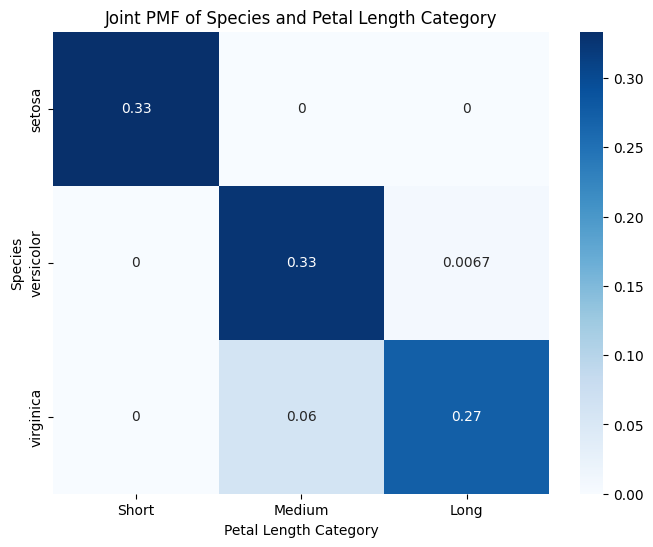

In [2]:
# Visualize the joint PMF
plt.figure(figsize=(8, 6))
sns.heatmap(joint_pmf, annot=True, cmap='Blues')
plt.title('Joint PMF of Species and Petal Length Category')
plt.xlabel('Petal Length Category')
plt.ylabel('Species')
plt.show()

*Code Analysis:*
1. We discretized the continuous variable petal_length into three categories.
2. Computed the joint pmf as the proportion of observations in each combination.
3. The heatmap shows the probabilities, revealing that each species corresponds to a specific petal length category.

## 2.3.1.2 Two Continuous Random Variables

The joint probability density function (pdf) describes the likelihood of two continuous random variables taking on specific values simultaneously.

**Definition 2.3.2**

Let $X$ and $Y$ be continuous random variables. A joint probability density function $f(x,y)$ satisfies:
1. $f(x, y) \geq 0$ for all $x,y$
2. $\displaystyle \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x, y) \, dx \, dy = 1$

For any two-dimensional set $A$:
* $P\left( (X, Y) \in A \right) = \iint_A f(x, y) \, dx \, dy$

**Marginal Probability Density Functions**

The marginal pdfs of $X$ and $Y$, denoted by
$𝑓_𝑋(𝑥)$ and $𝑓_Y(y)$, respectively, are given by:
* $f_X(x) = \int_{-\infty}^{\infty} f(x, y) \, dy, \quad f_Y(y) = \int_{-\infty}^{\infty} f(x, y) \, dx$

**2.3.2 Example: Joint PDF Using Iris Dataset**

Variables:
1. $X$: Petal Length
2. $𝑌$: Petal Width

Objective: Visualize the joint pdf of $X$ and $𝑌$ and compute marginal distributions.

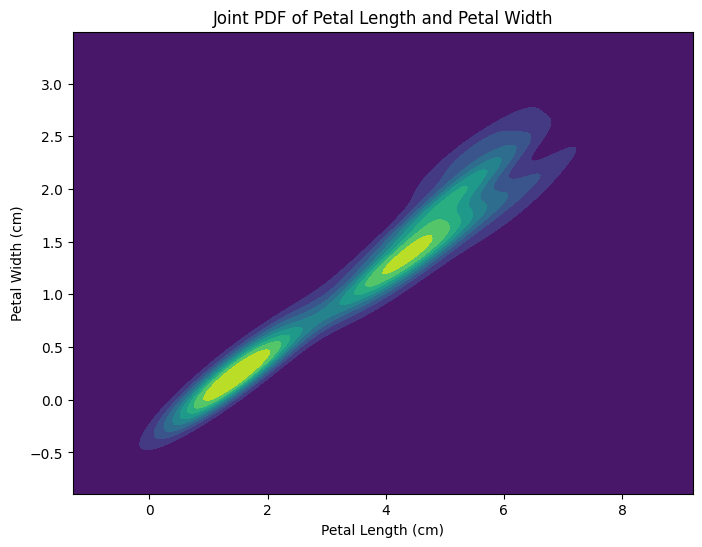

In [4]:
# Extract the variables
X = iris['petal_length']
Y = iris['petal_width']

# Visualize the joint distribution using a kernel density estimate
plt.figure(figsize=(8, 6))
sns.kdeplot(x=X, y=Y, cmap='viridis', fill=True, thresh=0)
plt.title('Joint PDF of Petal Length and Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

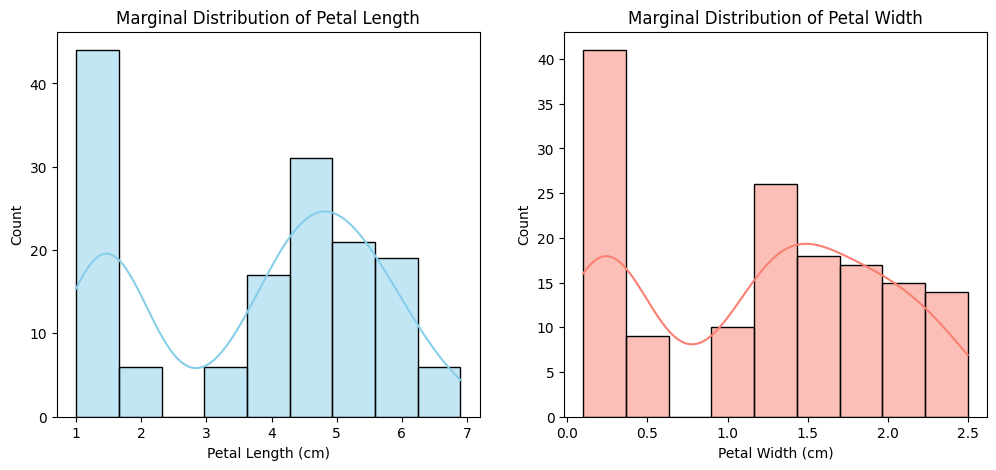

In [5]:
# Plot marginal distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Marginal distribution of Petal Length
sns.histplot(X, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Marginal Distribution of Petal Length')
ax[0].set_xlabel('Petal Length (cm)')

# Marginal distribution of Petal Width
sns.histplot(Y, kde=True, ax=ax[1], color='salmon')
ax[1].set_title('Marginal Distribution of Petal Width')
ax[1].set_xlabel('Petal Width (cm)')

plt.show()

*Code Analysis*
1. The kernel density estimate (KDE) provides a smooth approximation of the joint pdf.
2. The joint distribution shows a strong positive relationship between petal length and petal width.
3. The marginal distributions represent the distributions of petal length and petal width independently.

##2.3.1.3 Independent Random Variables


**Definition 2.3.3**

Two random variables $𝑋$ and $𝑌$ are independent if for all $𝑥$ and $𝑦$:

* For discrete variables: $p(x, y) = p_X(x) \cdot p_Y(y)$
* For continuous variables: $f(x, y) = f_X(x) \cdot f_Y(y)$

If this condition is not satisfied for all $𝑥$ and $𝑦$, $𝑋$ and $𝑌$ are dependent.


**2.3.3 Example: Testing Independence in the Iris Dataset**

Variables:
1. $X$: Sepal  Length
2. $𝑌$: Petal Length

Objective: Determine whether sepal length and petal length are independent.

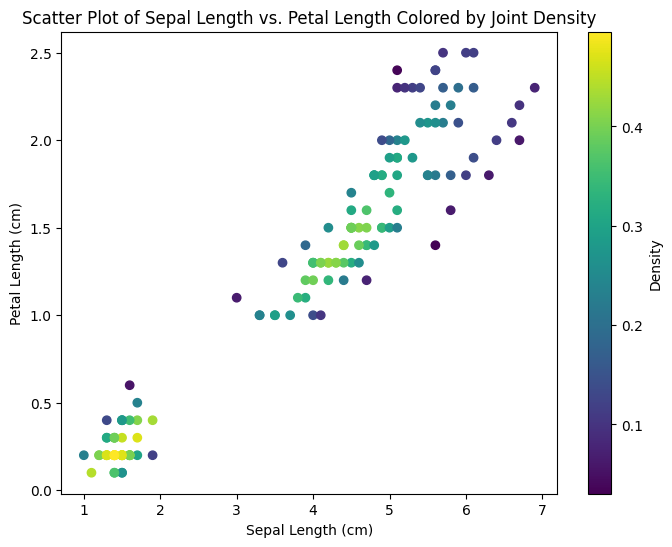

In [6]:
import numpy as np

# Compute the joint pdf using KDE
from scipy.stats import gaussian_kde

# Prepare data
xy = np.vstack([X, Y])
z = gaussian_kde(xy)(xy)

# Compute the marginal pdfs
fx = gaussian_kde(X)(X)
fy = gaussian_kde(Y)(Y)

# Compute the product of marginals
f_product = fx * fy

# Compare joint pdf with product of marginals
# Since we cannot compare densities directly, we'll visualize the relationship

# Scatter plot colored by density
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, c=z, cmap='viridis')
plt.title('Scatter Plot of Sepal Length vs. Petal Length Colored by Joint Density')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.colorbar(label='Density')
plt.show()

*Code Analysis*
1. The scatter plot shows a positive relationship between sepal length and petal length.
2. Since the variables are related, they are dependent.
3. We can also compute the correlation coefficient to quantify the dependence.


##**2.3.2 Correlation and Dependence**

Correlation quantifies the strength and direction of the linear relationship between two variables, while dependence indicates any kind of relationship.

##2.3.2.1 Correlation for Random Variables

**Definition 2.3.4**

The covariance between two random variables $𝑋$ and $𝑌$ is:
* $\text{Cov}(X, Y) = E[(X - \mu_X)(Y - \mu_Y)]$

**Definition 2.3.5**

The correlation coefficient $\rho_{X,Y}$ is:
* $\rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}$

**Properties**

1. $-1 \leq \rho_{X,Y} \leq 1$
2. $\rho_{X,Y} = 1$, indicates perfect positive linear correlation.
3. $\rho_{X,Y} = -1$, indicates perfect negative linear correlation.
4. $\rho_{X,Y} = 0$,  implies no linear correlation.

**2.3.4 Example: Correlation in the Iris Dataset**

Variables:
1. $X$: Sepal  Length
2. $𝑌$: Petal Length

Objective: Calculate the covariance and correlation coefficient between sepal length and petal length.

In [7]:
# Calculate means
mu_X = X.mean()
mu_Y = Y.mean()

# Calculate covariance
cov_XY = ((X - mu_X) * (Y - mu_Y)).mean()

# Calculate standard deviations
sigma_X = X.std()
sigma_Y = Y.std()

# Calculate correlation coefficient
rho_XY = cov_XY / (sigma_X * sigma_Y)

print(f"Covariance between Sepal Length and Petal Length: {cov_XY:.3f}")
print(f"Correlation coefficient between Sepal Length and Petal Length: {rho_XY:.3f}")

Covariance between Sepal Length and Petal Length: 1.287
Correlation coefficient between Sepal Length and Petal Length: 0.956


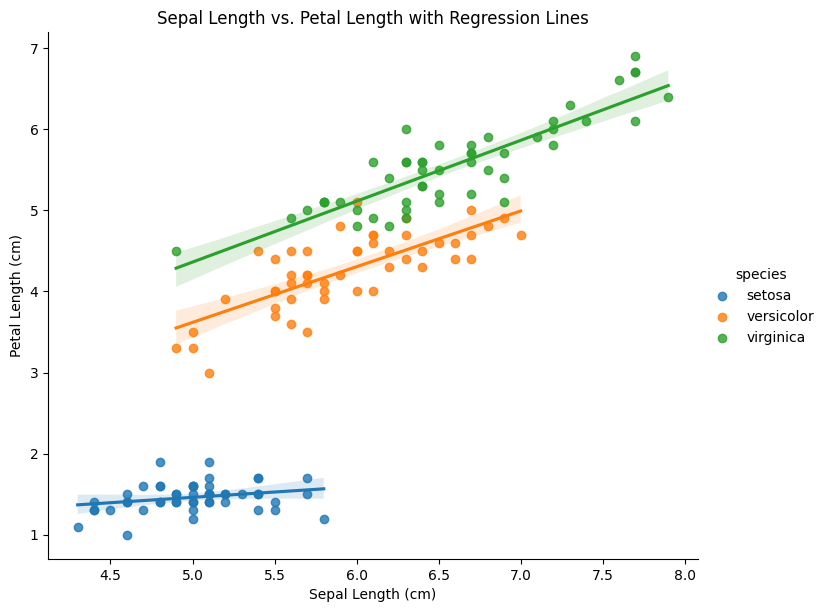

In [8]:
# Scatter plot with regression line
sns.lmplot(x='sepal_length', y='petal_length', data=iris, hue='species', height=6, aspect=1.2)
plt.title('Sepal Length vs. Petal Length with Regression Lines')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

*Code Analysis*
1. The high positive correlation coefficient indicates a strong positive linear relationship.
2. The regression lines for each species show the relationship within species.
3. The correlation suggests that as sepal length increases, petal length tends to increase.

## 2.3.2.2 Correlation for Samples




**Sample Covariance**
* $s_{XY} = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})$

**Sample Correlation Coefficient**
* $r_{XY} = \frac{s_{XY}}{s_X s_Y}$

**2.3.5 Example: Correlation Between Variables in the Iris Dataset**

Variables (All numeric):
1. Sepal  Length
2. Petal Length
3. Petal Width
4. Sepal Width

Objective: Compute the correlation matrix and visualize it.

In [9]:
# Compute the correlation matrix
corr_matrix = iris.iloc[:, 0:4].corr()

print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


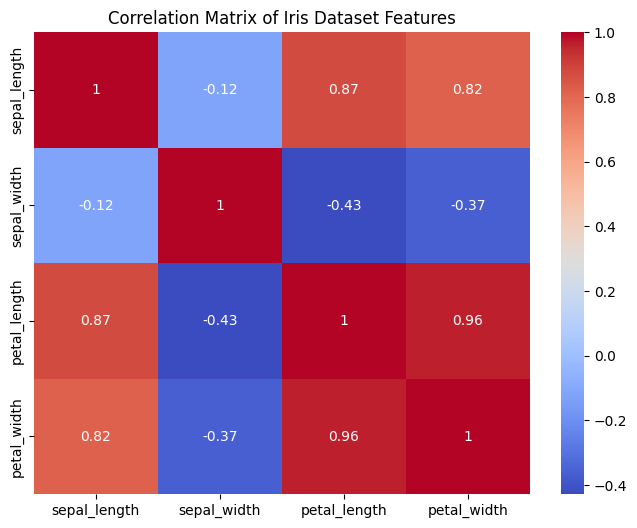

In [10]:
# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Iris Dataset Features')
plt.show()

*Code Analysis*
1. High Positive Correlations:
* Petal length and petal width (r=0.963)
* Sepal length and petal length (r=0.872)
* Sepal length and petal width (r=0.818)
2. Negative Correlations:
* Sepal width is negatively correlated with the other features.
* The negative correlation between sepal width and petal measurements indicates that as petal dimensions increase, sepal width tends to decrease.

## **2.3.3 Random Samples**

Random samples are essential for statistical inference, allowing us to make conclusions about a population based on sample data.


## 2.3.3.1 Random Samples


**Definition 2.3.6**

Random variables $X_1, X_2, \dots, X_n$ form a random sample of size
$𝑛$ if:
1. The $𝑋_𝑖$ are independent random variables.
2. Each $𝑋_𝑖$ has the same probability distribution.

**Properties**
1. The sample mean $\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i$ estimates the population mean $𝜇$.
2. The sample variance $S^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})^2$  estimates the population variance $\sigma^2$.

**2.3.6 Example: Drawing Random Samples from  the Iris Dataset**

Objective:  Demonstrate random sampling and compute sample statistics.

In [11]:
# Set random seed for reproducibility
np.random.seed(42)

# Population: Petal Lengths of the Iris dataset
population = iris['petal_length']

# Draw a random sample of size n
n = 30
sample = population.sample(n, replace=False)

# Sample statistics
sample_mean = sample.mean()
sample_std = sample.std(ddof=1)

# Population statistics
population_mean = population.mean()
population_std = population.std(ddof=1)

print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")
print(f"Population Mean: {population_mean:.2f}")
print(f"Population Standard Deviation: {population_std:.2f}")

Sample Mean: 3.88
Sample Standard Deviation: 1.84
Population Mean: 3.76
Population Standard Deviation: 1.77


##2.3.3.2 The Central Limit Theorem

**Theorem 2.3.7 (Central Limit Theorem)**

Let $X_1, X_2, \dots, X_n$ be a random sample from a distribution with mean $𝜇$ and variance $𝜎^2$. Then, as $𝑛$ becomes large, the sampling distribution of the sample mean $𝑋$ approaches a normal distribution:
* $\bar{X} \sim N\left( \mu, \frac{\sigma^2}{n} \right)$



**2.3.7 Example: Demonstration of the CLT Using the Iris Dataset**

Objective:  Show that the distribution of sample means approximates a normal distribution as the sample size increases.

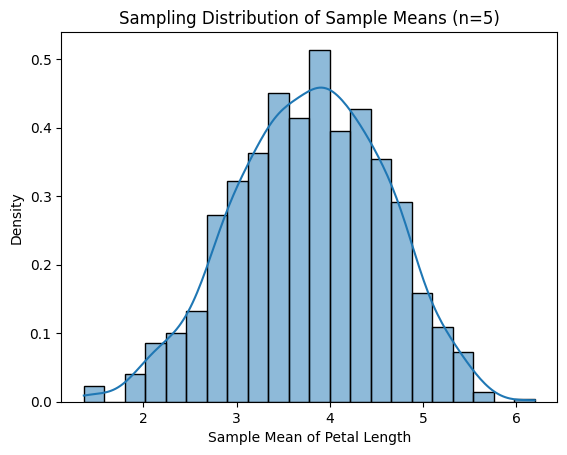

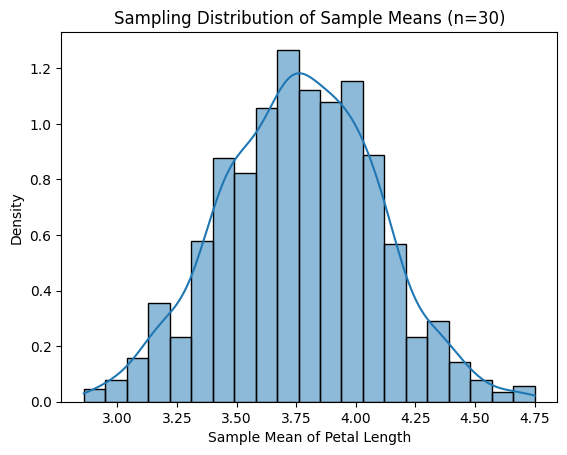

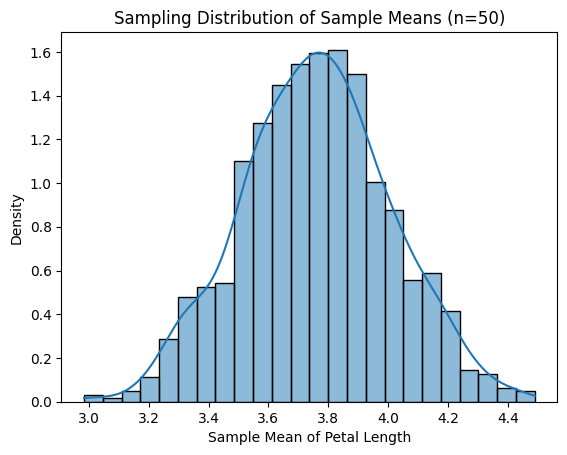

In [12]:
import matplotlib.pyplot as plt

# Function to generate sample means
def generate_sample_means(sample_size, num_samples):
    sample_means = []
    for _ in range(num_samples):
        sample = population.sample(sample_size, replace=True)
        sample_means.append(sample.mean())
    return sample_means

# Sample sizes
sample_sizes = [5, 30, 50]

# Generate and plot sample means
for n in sample_sizes:
    sample_means = generate_sample_means(sample_size=n, num_samples=1000)
    sns.histplot(sample_means, kde=True, stat='density')
    plt.title(f'Sampling Distribution of Sample Means (n={n})')
    plt.xlabel('Sample Mean of Petal Length')
    plt.ylabel('Density')
    plt.show()

*Code Analysis*
1. For small  $𝑛$, the sampling distribution is wider and less normal.
2. As $𝑛$ increases, the sampling distribution becomes approximately normal with a smaller variance.
3. This demonstrates the Central Limit Theorem.